# The Singular Value Decomposition

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

Today we'll study the most useful decomposition in applied Linear Algebra.

Pretty exciting, eh?

The singular value decomposition is a matrix factorization.  

__EVERY__ matrix has a singular value decomposition.

The singular value decomposition (let's just call it SVD) is based on a very simple idea, which is closely related to eigendecomposition.


Recall:  the eigenvalues of a (square) matrix $A$ measure the amount that $A$ "stretches or shrinks" certain special vectors (the eigenvectors).

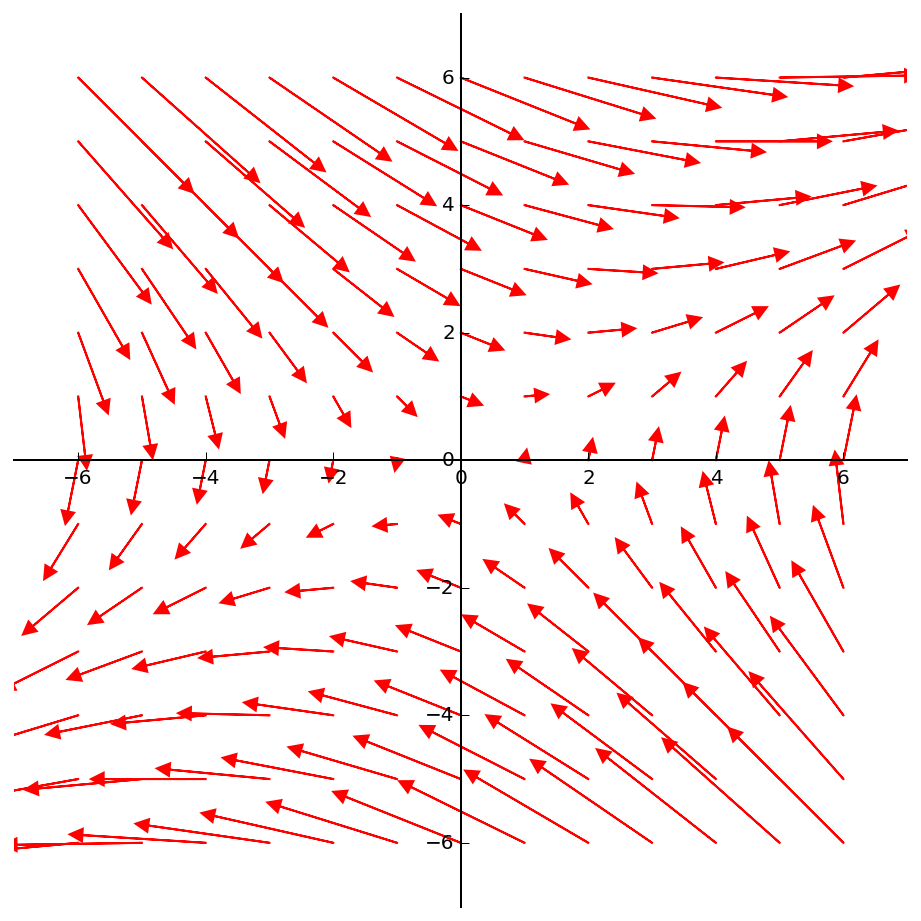

In [3]:
sl.hide_code_in_slideshow()
V = np.array([[2,-1],[1,1]])
L = np.array([[1.2,0],
              [0,0.7]])
A = V.dot(L).dot(np.linalg.inv(V))
ax = dm.plotSetup(-7,7,-7, 7, size=(12,8))
ut.centerAxes(ax)
for x in range(-6,7):
    for y in range(-6,7):
        v = np.array([x,y])
        ut.plotArrowVec(ax, A.dot(v), v)
print('')

For example, if $A\vx = \lambda\vx$ and $\Vert x\Vert = 1,$ then

$$\Vert A\vx\Vert = \Vert\lambda\vx\Vert = |\lambda|\,\Vert\vx\Vert = |\lambda|.$$

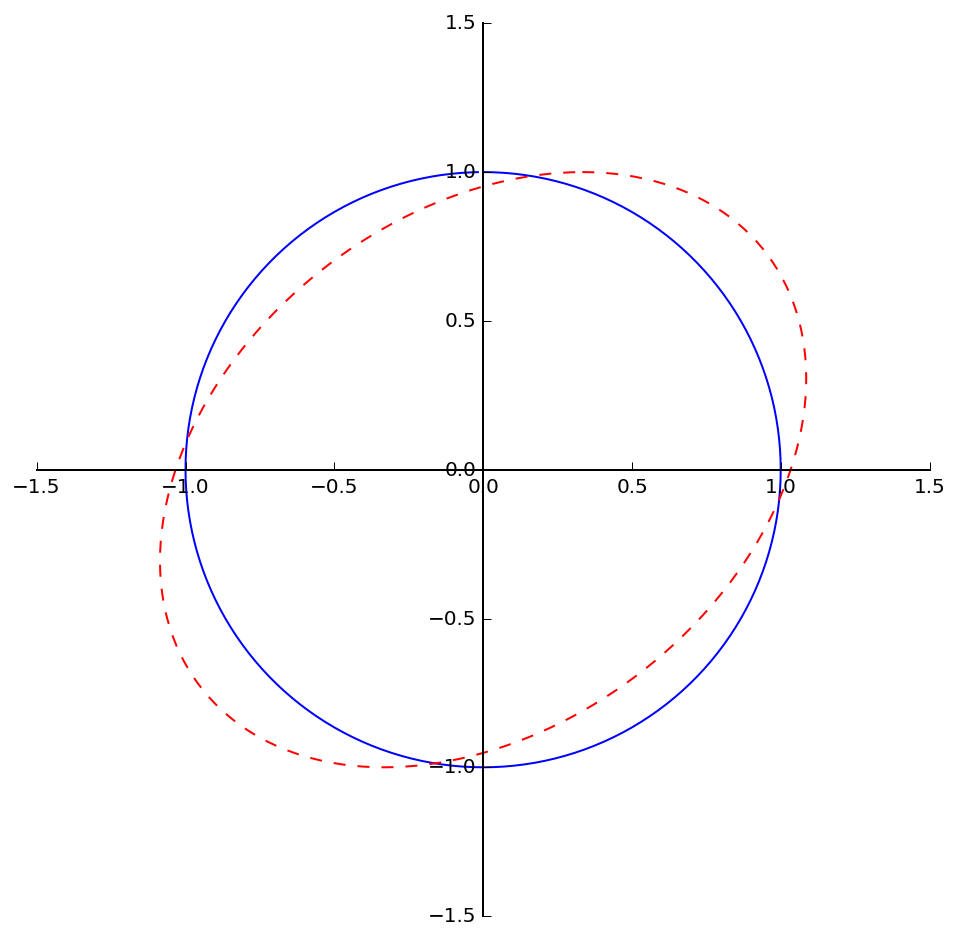

In [4]:
sl.hide_code_in_slideshow()
ax = dm.plotSetup(-1.5,1.5,-1.5, 1.5, size=(12,8))
ut.centerAxes(ax)
theta = [2 * np.pi * f for f in np.array(range(360))/360.0]
x = [np.array([np.sin(t), np.cos(t)]) for t in theta]
Ax = [A.dot(xv) for xv in x]
ax.plot([xv[0] for xv in x],[xv[1] for xv in x],'-b')
ax.plot([Axv[0] for Axv in Ax],[Axv[1] for Axv in x],'--r')
print('')

If $\lambda_1$ is the eigenvalue with the greatest magnitude, then a corresponding unit eigenvector $\vv_1$ identifies a direction in which the stretching effect of $A$ is greatest.

That is, over all unit vectors $\vx$, the length of $A\vx$ is maximized when $\vx = \vv_1$.

In which case, $\Vert A\vv_1\Vert = |\lambda_1|$.

Now let's see by example how we can extend this idea to __arbitrary__ (non-square) matrices.

__Example.__

If $A = \mat{{rrr}4&11&14\\8&7&-2},$ then the linear transformation $\vx \mapsto A\vx$ maps the unit sphere $\{\vx : \Vert \vx \Vert = 1\}$ in $\R^3$ onto an ellipse in $\R^2$, as shown here:

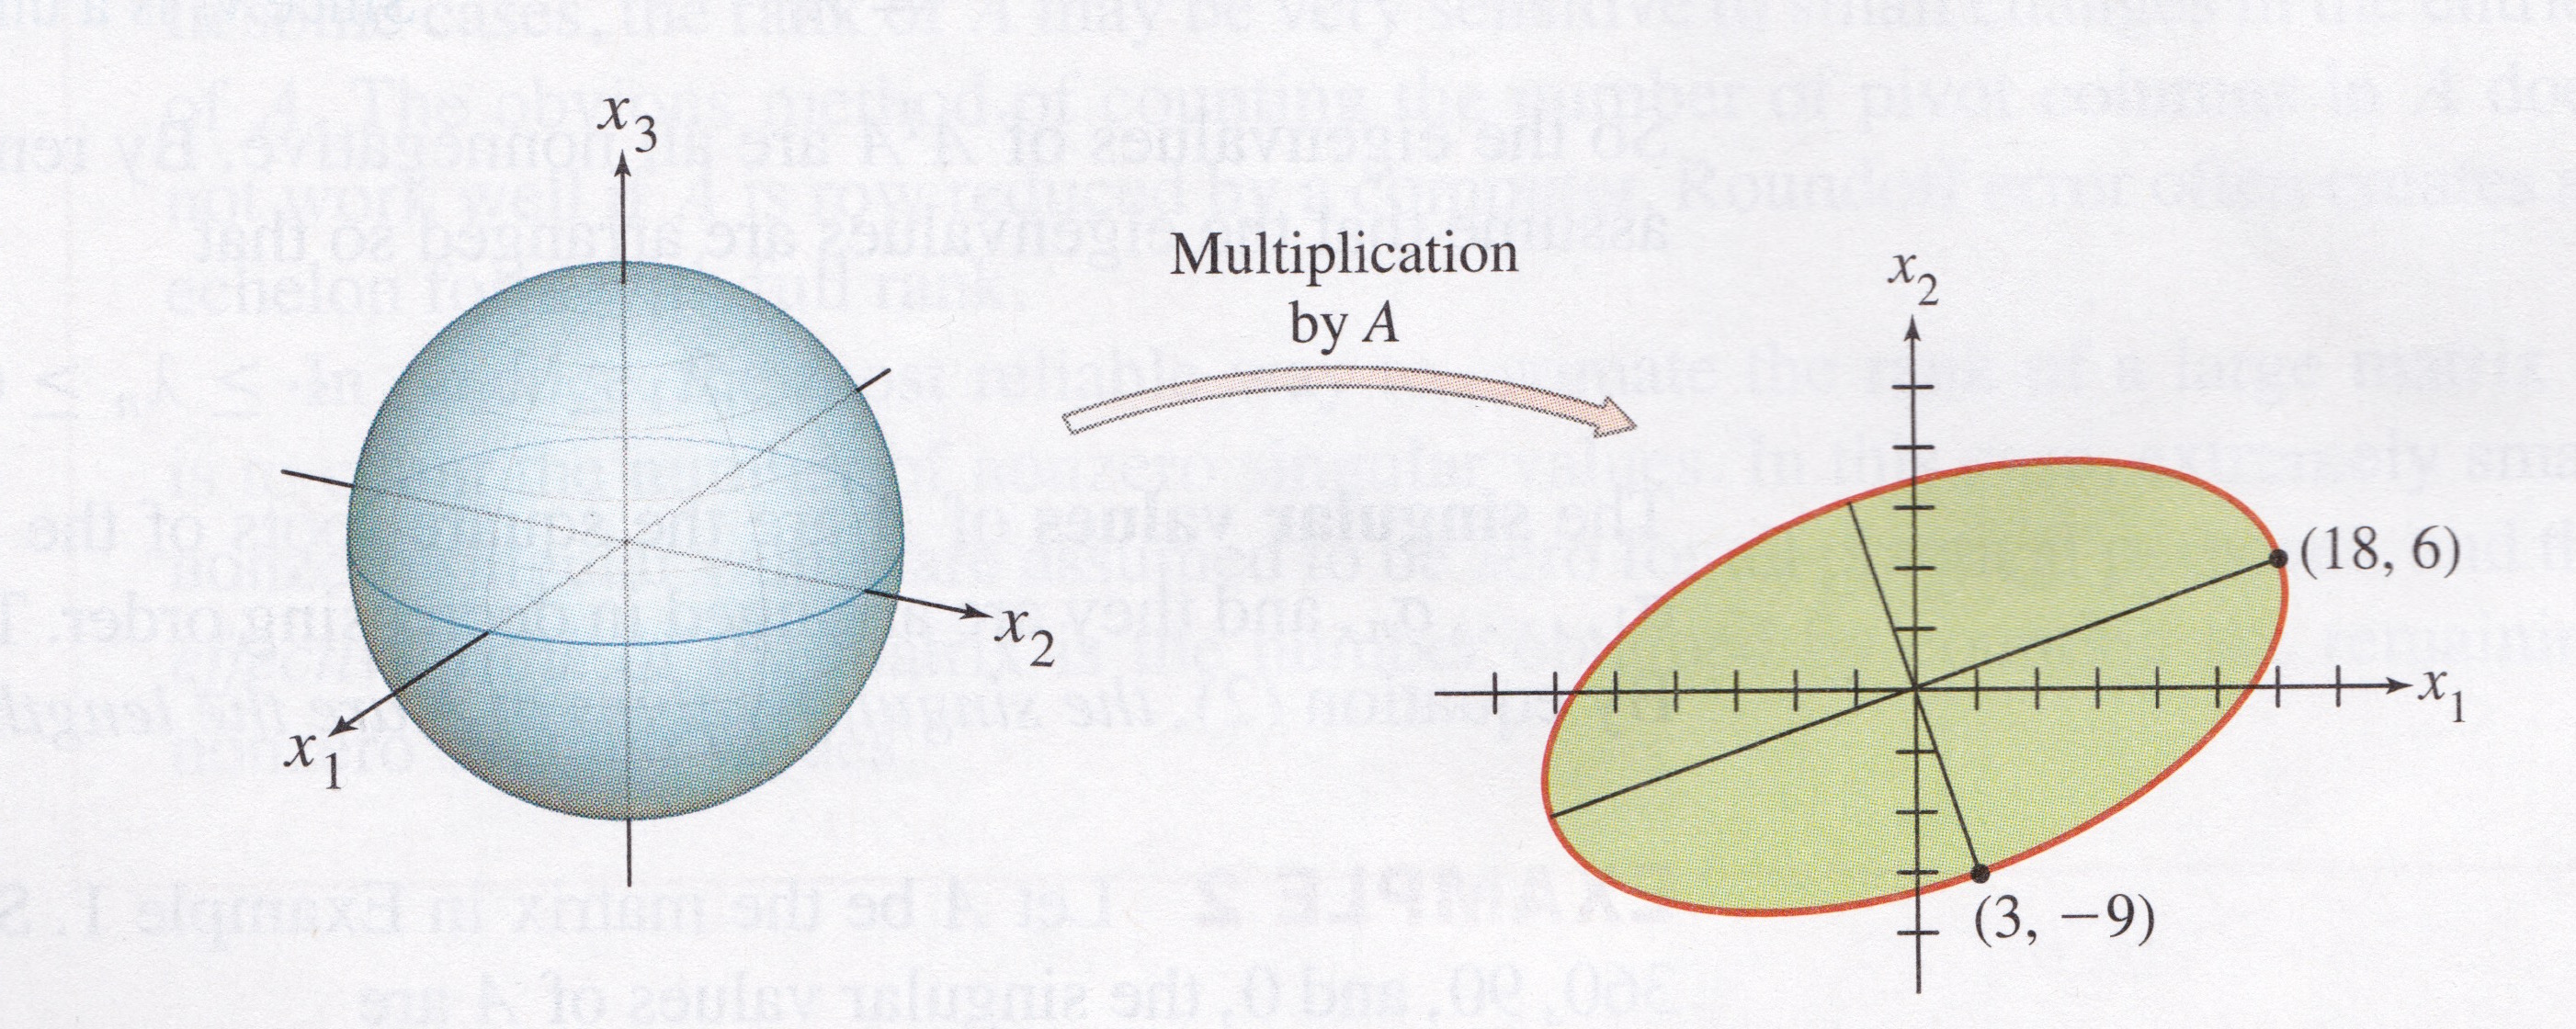

In [5]:
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-7-4-1.jpg", width=650))

__Problem.__ Find the unit vector $\vx$ at which the length $\Vert A\vx\Vert$ is maximized, and compute this maximum length.

__Solution.__

The quantity $\Vert A\vx\Vert^2$ is maximized at the same $\vx$ that maximizes $\Vert A\vx\Vert$, and $\Vert A\vx\Vert^2$ is easier to study.

Observe that

$$ \Vert A\vx\Vert^2 = (A\vx)^T(A\vx) $$

$$ = \vx^TA^TA\vx $$

$$ = \vx^T(A^TA)\vx $$

Now, $A^TA$ is a symmetric matrix.  

So the above is a quadratic form, and we are seeking to maximize it subject to the constraint $\Vert x\Vert = 1$.

As we learned in the last lecture, the maximum value subject to the constraint is the largest eigenvalue $\lambda_1$ of $A^TA$.

Also, the maximum is attained at a unit eigenvector of $A^TA$ corresponding to $\lambda_1$.

For the matrix $A$ in the example,

$$A^TA = \mat{{rr}4&8\\11&7\\14&-2} \,\mat{{rrr}4&11&14\\8&7&-2} = \mat{{rrr}80&100&40\\100&170&140\\40&140&200}.$$

The eigenvalues of $A^TA$ are $\lambda_1 = 360, \lambda_2 = 90,$ and $\lambda_3 = 0.$   

The corresponding unit eigenvectors are, respectively, 

$$\vv_1 = \mat{{r}1/3\\2/3\\2/3}, \vv_2 = \mat{{r}-2/3\\-1/3\\2/3}, \vv_3 = \mat{{r}2/3\\-2/3\\1/3}.  $$

For $\Vert\vx\Vert = 1$, the maximum value of $\Vert A\vx\Vert$ is $\Vert A\vv_1\Vert = \sqrt{360}.$

This example shows that the key to understanding the effect of $A$ on the unit sphere in $\R^3$ is to examime the quadratic form $\vx^T(A^TA)\vx.$  

In fact, the entire geometric behavior of the transformation $\vx\mapsto A\vx$ is captured by this quadratic form.

## The Singular Values of a Matrix

Let $A$ be an arbtrary $m\times n$ matrix. 

Notice that $A^TA$ is symmetric.   So, it can be orthogonally diagonalized (as we saw in the last lecture).

So let $\{\vv_1, \dots, \vv_n\}$ be an orthonormal basis for $\R^n$ consisting of eigenvectors of $A^TA$, and let $\lambda_1, \dots, \lambda_n$ be the corresponding eigenvalues of $A^TA$.  

Then, for any eigenvector $\vv_i$, 

$$ \Vert A\vv_i\Vert^2 = (A\vv_i)^T A\vv_i = \vv_i^T A^TA\vv_i $$

$$ = \vv_i^T(\lambda_i)\vv_i $$
(since $\vv_i$ is an eigenvector of $A^TA$)

$$ = \lambda_i$$
(since $\vv_i$ is a unit vector.)

So the eigenvalues of $A^TA$ are all nonnegative 

(that is: $A^TA$ is positive semidefinite).

We can therefore renumber the eigenvalues so that

$$\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_n \geq 0.$$

__Definition.__ The __singular values__ of $A$ are the square roots of the eigenvalues of $A^TA$.  They are denoted by $\sigma_1,\dots,\sigma_n,$ and they are arranged in decreasing order.

That is, $\sigma_i = \sqrt{\lambda_i}$ for $i = 1,\dots,n.$

By the above argument, __the singular values of $A$ are the lengths of the vectors $A\vv_1, \dots, A\vv_n.$__

Now: we know that vectors $\vv_1, \dots, \vv_n$ are an orthogonal set because they are eigenvectors of the symmetric matrix $A^TA$.  

However, it's __also__ the case that $A\vv_1, \dots, A\vv_n$ are an orthogonal set.

... a fact which is key to the SVD.

Let's prove it.

__Theorem.__ Suppose $\{\vv_1, \dots, \vv_n\}$ is an orthonormal basis of $\R^n$ consisting of eigenvectors of $A^TA$, arranged so that the corresponding eigenvalues of $A^TA$ satisfy $\lambda_1 \geq \cdots \geq \lambda_n,$ and suppose $A$ has $r$ nonzero singular values.  Then $\{A\vv_1, \dots, A\vv_r\}$ is an orthogonal basis for $\col\ A,$ and rank $A = r$. 

__Proof.__   Recall that what we need to do is establish that $\{A\vv_1, \dots, A\vv_r\}$ is a (orthogonal) linearly independent set whose span is $\col\ A$.


Because $\vv_i$ and $\vv_j$ are orthogonal for $i\neq j$,

$$ (A\vv_i)^T(A\vv_j) = \vv_i^TA^TA\vv_j = \vv_i^T(\lambda_j \vv_j) = 0.$$

So $\{A\vv_1, \dots, A\vv_n\}$ is an orthogonal set.

Furthermore, since the lengths of the vectors $A\vv_1, \dots, A\vv_n$ are the singular values of $A$, and since there are $r$ nonzero singular values, $A\vv_i \neq {\mathbf 0}$ if and only if $1 \leq i \leq r.$

So $A\vv_1, \dots, A\vv_r$ are a linearly independent set (because they are orthogonal and all nonzero), and clearly they are each in $\col\ A$.

Finally, we just need to show that Span $\{A\vv_1, \dots, A\vv_r\}$ = $\col\ A$. 

To do this we'll show that for any $\vy$ in $\col\ A$, we can write $\vy$ in terms of $\{A\vv_1, \dots, A\vv_r\}$:

Say $\vy = A\vx.$

Because $\{\vv_1, \dots, \vv_n\}$ is a basis for $\R^n$, we can write $\vx = c_1\vv_1 + \dots + c_n\vv_n,$ so

$$\vy = A\vx = c_1A\vv_1 + \dots + c_rA\vv_r + \dots + c_nA\vv_n.$$

$$ = c_1A\vv_1 + \dots + c_rA\vv_r. $$
(because $A\vv_i = {\mathbf 0}$ for $i > r$).

In summary: $\{A\vv_1, \dots, A\vv_n\}$ is an (orthogonal) linearly independent set whose span is $\col\ A$, so it is an (orthogonal) basis for $\col\ A$.

Notice that we have also proved that rank $A = \dim\col\ A = r.$

In other words, if $A$ has $r$ nonzero singular values, $A$ has rank $r$.

## The Singular Value Decomposition

Note that the domain of $A\vx$ is $\R^n$ and the range of $A\vx$ is $\col\ A.$

So what we have proved is that the eigenvectors of $A^TA$ are rather special.

We have proved that the set $\{\vv_i\}$ is an orthogonal basis for the domain of $A\vx$, and $\{A\vv_i\}$ is an orthogonal basis for the range of $A\vx$.

Now we can define the SVD.

__Theorem.__ Let $A$ be an $m\times n$ matrix with rank $r$.  Then there exists an $r\times r$ matrix $\Sigma$ whose diagonal entries are the $r$ nonzero singular values of $A$, $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0,$ and there exist an $m\times r$ orthogonal matrix $U$ and an $n\times r$ orthogonal matrix $V$ such that 

$$ A = U\Sigma V^T. $$

Any factorization $A = U\Sigma V^T,$ with $U$ and $V$ orthogonal and $\Sigma$ a diagonal matrix is called a __singular value decomposition (SVD)__ of $A$.  

The columns of $U$ are called the __left singular vectors__ and the columns of $V$ are called the __right singular vectors__ of $A$.

We have built up enough tools now that the proof is quite straightforward.

__Proof.__  Let $\lambda_i$ and $\vv_i$ be the eigenvalues and eigenvectors of $A^TA$, and $\sigma_i = \sqrt{\lambda_i}$.

As we have seen, $\{A\vv_1, \dots, A\vv_r\}$ is an orthogonal basis for $\col\ A.$

Normalize each $A\vv_i$ to obtain an orthonormal basis $\{\vu_1,\dots,\vu_r\}$, where

$$ \vu_i = \frac{1}{\Vert A\vv_i\Vert} = \frac{1}{\sigma_i}A\vv_i $$

Then

$$ A\vv_i = \sigma_i\vu_i\;\;\;\;(1 \leq i \leq r)$$

So

$$ AV = \mat{{ccc}A\vv_1&\cdots&A\vv_r} = \mat{{ccc}\sigma_1\vu_1&\cdots&\sigma_r\vu_r} = U\Sigma. $$

Now, $V$ is an orthogonal matrix, so

$$ U\Sigma V^T = AVV^T = A. $$

## Approximating a Matrix

One way to think of the SVD is that it gives tools for approximating one matrix by another matrix.

To talk about when one matrix "approximates" another, we need a "length" for matrices.  

We will use the __Frobenius norm__ which is just the usual norm, treating the matrix as if it were a vector.

In other words, the definition of the Frobenius norm of $A$, denoted $\Vert A\Vert_F$, is:

$$\Vert A\Vert_F = \sqrt{\sum a_{ij}^2}.$$

The approximations we'll discuss are __low-rank__ approximations.

Recall that the rank of a matrix $A$ is the largest number of linearly independent columns of $A$.

Let's define the __rank-$k$ approximation__ to $A$:

When $k < \rank\ A$, the rank-$k$ approximation to $A$ is the closest rank-$k$ matrix to $A$, i.e., 

$$A^{(k)} =\arg \min_{\rank\ B = k} \Vert A-B\Vert_F.$$

Note that this matrix may take up __much__ less space than the orignal $A$.

$$ \mbox{m}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{cccc}\begin{array}{c}\vdots\\\vdots\\{\bf a_1}\\\vdots\\\vdots\end{array}&\begin{array}{c}\vdots\\\vdots\\{\bf a_2}\\\vdots\\\vdots\end{array}&\dots&\begin{array}{c}\vdots\\\vdots\\{\bf a_n}\\\vdots\\\vdots\end{array}\\\end{array}\right]}^{\mbox{n}} =
\overbrace{\left[\begin{array}{cc}\vdots&\vdots\\\vdots&\vdots\\\sigma_1\vu_1&\sigma_k\vu_k\\\vdots&\vdots\\\vdots&\vdots\end{array}\right]}^{\large k}
\times
\left[\begin{array}{ccccc}\dots&\dots&\vv_1&\dots&\dots\\\dots&\dots&\vv_k&\dots&\dots\end{array}\right]$$

The rank-$k$ approximation takes up space $(m+n)k$ while $A$ itself takes space $mn$.

For example, if $k=10$ and $m = n = 1000$, then the rank-$k$ approximation takes space $20000/1000000 = 2\%$ of $A$.

Here is (one of many) remarkable facts about the SVD:

The best rank-$k$ approximation to any matrix can be found via the SVD.

In fact, for an $m\times n$ matrix $A$, the SVD does two things:

1. It gives the best rank-$k$ approximation to $A$ for __every__ $k$ up to the rank of $A$.
2. It gives the __distance__ of the best rank-$k$ approximation $A^{(k)}$ from $A$ for each $k$.

In terms of the singular value decomposition, 

1)  The best rank-$k$ approximation to $A$ is formed by taking 

   * $U' = $ the $k$ leftmost columns of $U$, 
   * $\Sigma ' = $ the $k\times k$ upper left submatrix of $\Sigma$, and 
   * $V'= $ the $k$ leftmost columns of $V$, and constructing 

$$ A^{(k)} = U'\Sigma'(V')^T.$$

2) The distance (in Frobenius norm) of the best rank-$k$ approximation $A^{(k)}$ from $A$ is equal to $\sqrt{\sum_{i=k+1}^r\sigma^2_i}$.

What this means is that if, beyond some $k$, all of the singular values are small, then $A$ can be closely approximated by a rank-$k$ matrix.   


__Example: signal compression.__

Image data is often  __approximately low-rank.__

For example, here is a photo, which is really a $512\times 512$ matrix:

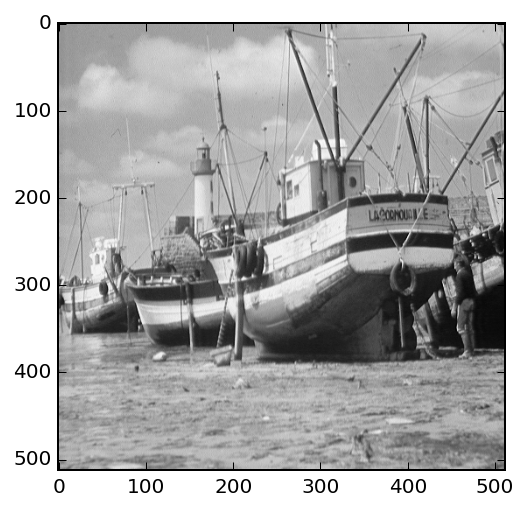

In [6]:
sl.hide_code_in_slideshow()
boat = np.loadtxt('data/boat.dat')
import matplotlib.cm as cm
plt.figure()
plt.imshow(boat,cmap = cm.Greys_r)
print('')

Let's look at its singular values (often called the matrix's "spectrum"):

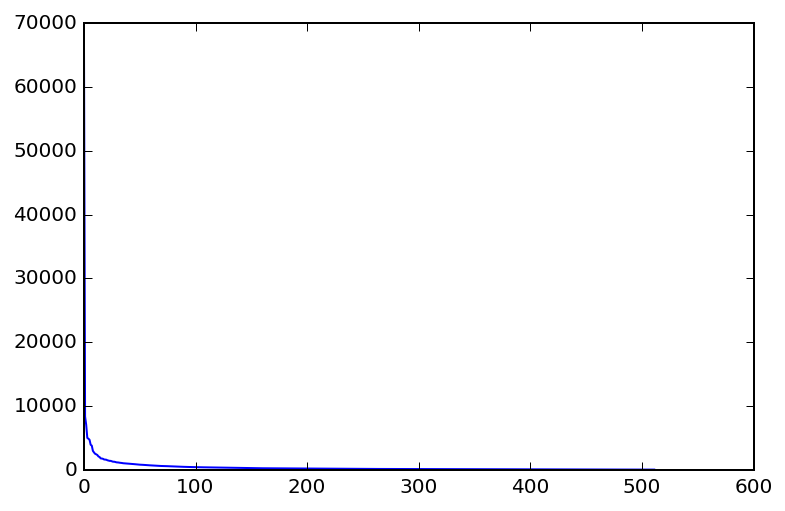

In [37]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.figure()
plt.plot(s)

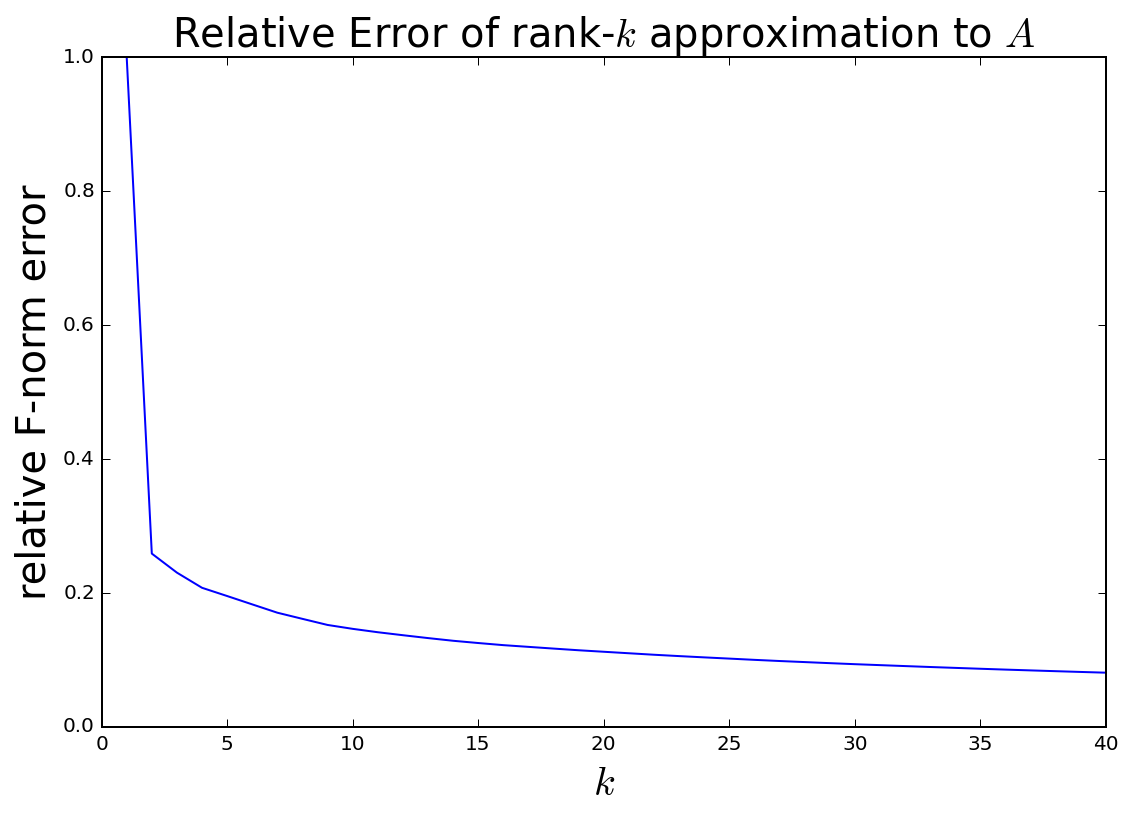

In [17]:
sl.hide_code_in_slideshow()
fig = plt.figure(figsize=(9,6))
Anorm = np.linalg.norm(boat)
err = np.cumsum(s[::-1]**2)
err = np.sqrt(err[::-1])
plt.plot(range(1,41),err[:40]/Anorm)
plt.xlim([0,40])
plt.ylim([0,1])
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'relative F-norm error',size=20)
plt.title(r'Relative Error of rank-$k$ approximation to $A$',size=20)
print('')

This matrix has rank of 512.   But its "effective" rank is low, perhaps 40.

Let's find the closest rank-40 matrix and view it.

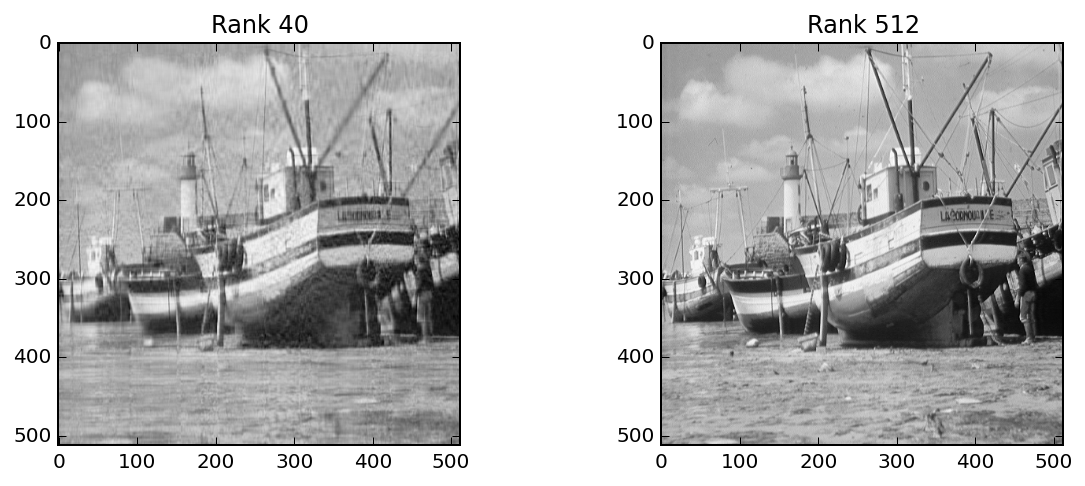

In [42]:
# construct a rank-n version of the boat
scopy = s.copy()
rank = 40
scopy[rank:]=0
boatApprox = u.dot(np.diag(scopy)).dot(vt)
#
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boatApprox,cmap = cm.Greys_r)
plt.title('Rank {}'.format(rank))
plt.subplot(1,2,2)
plt.imshow(boat,cmap = cm.Greys_r)
plt.title('Rank 512')
plt.subplots_adjust(wspace=0.5)
print('')

Note that the rank-40 boat takes up only 40/512 = __8% of the space as the original image!__

This general principle is what makes image, video, and sound compression effective.  

When you watch HDTV, or listen to an MP3, or look at a JPEG image, these signals have been compressed using the fact that they are basically __low-rank__ matrices.

__Example: Pattern extraction.__

Another remarkable feature of the SVD is that it __automatically extracts common patterns__ from a set of data.

Here is an example: data traffic flowing over a network.

We'll look at OD flow traffic on the Abilene network:

<img src='images/Abilene-map.png'>

Source: Internet2, circa 2005

This matrix has 121 columns and 1008 rows.

Its rank is 121.

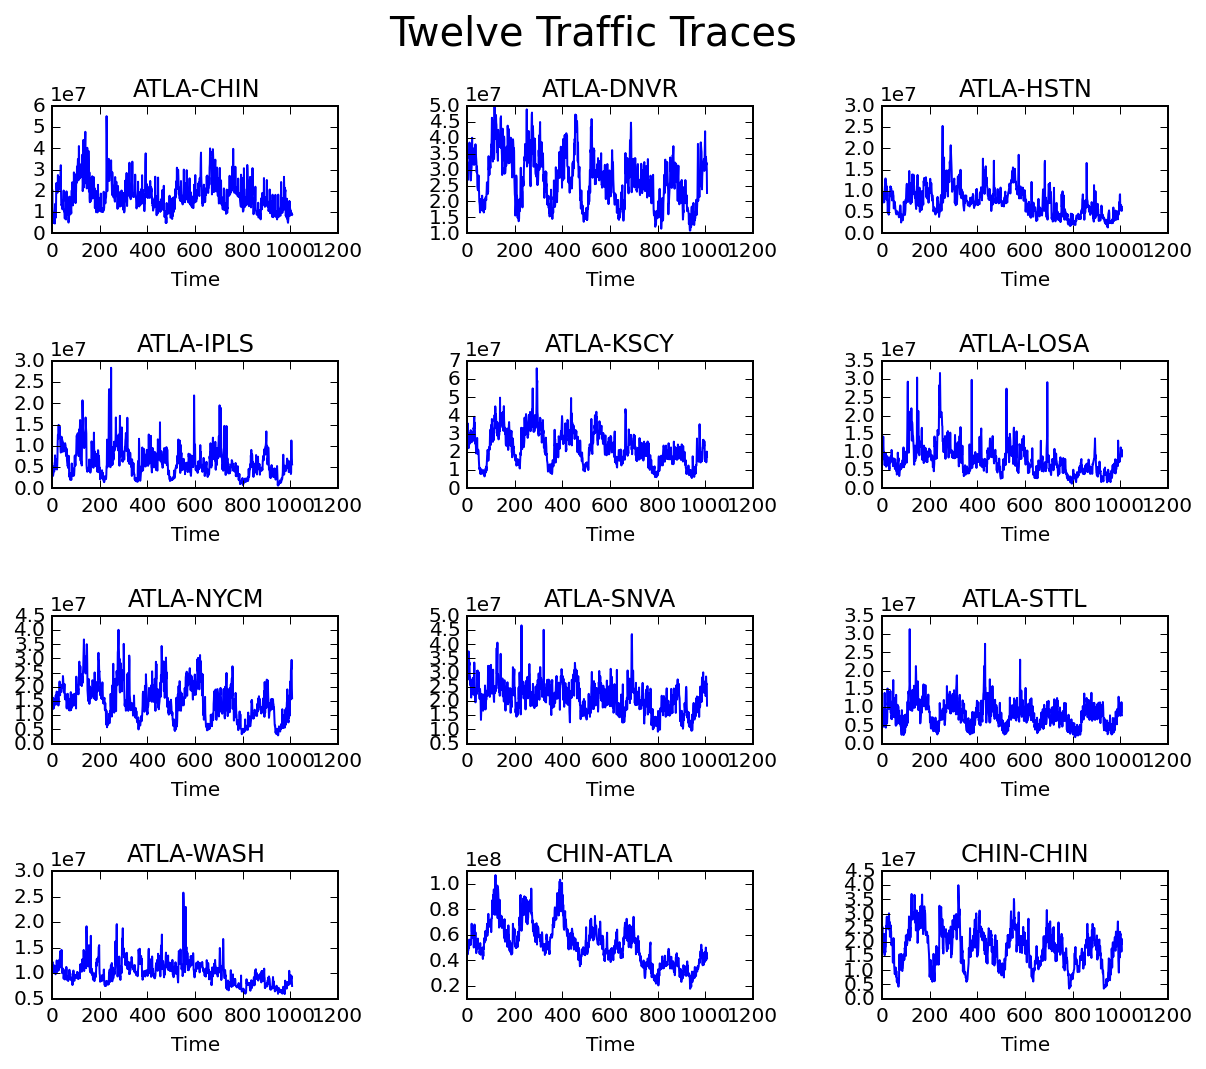

In [10]:
sl.hide_code_in_slideshow()
with open('data/odnames','r') as f:
    odnames = [line.strip() for line in f]
dates = pd.date_range('9/1/2003',freq='10min',periods=1008)
Atraf = pd.read_table('data/X',sep='  ',header=None,names=odnames,engine='python')
Atraf.index = dates
plt.figure(figsize=(10,8))
for i in range(1,13):
    ax = plt.subplot(4,3,i)
    plt.plot(Atraf.ix[:,i-1])
    plt.title(odnames[i])
    plt.xlabel('Time')
plt.subplots_adjust(wspace=0.45,hspace=1)
plt.suptitle('Twelve Traffic Traces',size=20)
print('')

Each traffic trace is a column of $A$.

$$ A \approx U'\Sigma'(V')^T $$

In this interpretation, we think of each column of $A$ as a combination of the columns of $U'$.

Let's use as our example $\va_1,$ the first column of $A$.

This happens to be the ATLA-CHIN flow.

The equation above tells us that

$$\va_1 \approx v_{11}\sigma_1\vu_1 + v_{12}\sigma_2\vu_2 + \dots + v_{1k}\sigma_k\vu_k.$$

In other words, $\vu_1$ (the first column of $U$) is the "strongest" pattern occurring in $A$, and its strength is measured by $\sigma_1$.

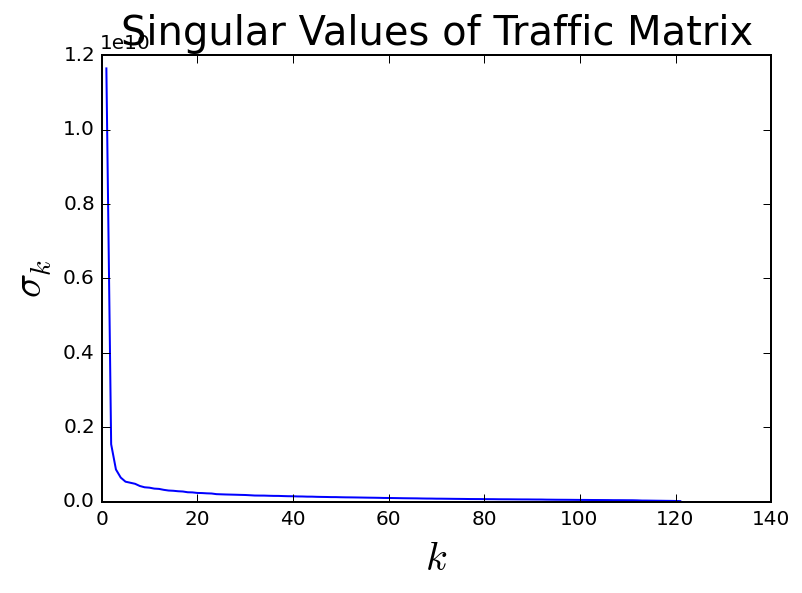

In [34]:
u,s,vt = np.linalg.svd(Atraf)
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,1+len(s)),s)
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$\sigma_k$',size=20)
plt.title(r'Singular Values of Traffic Matrix',size=20)
print('')

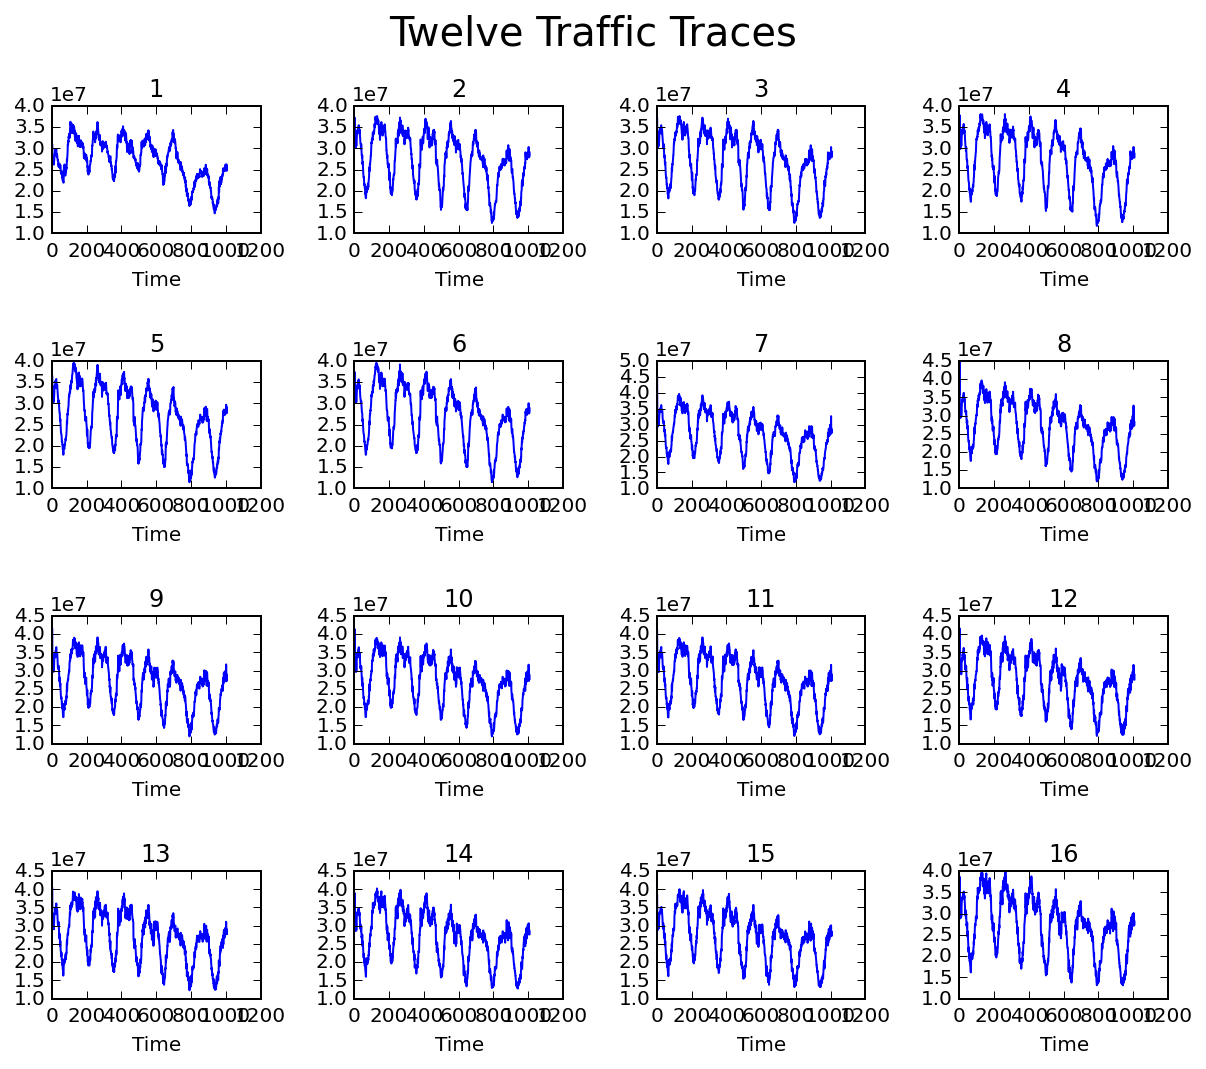

In [35]:
plt.figure(figsize=(10,8))
recon = np.zeros((1008))
for i in range(1,17):
    ax = plt.subplot(4,4,i)
    recon = recon + (u[:,i-1] * s[i-1] * vt[i-1,1])
    plt.plot(recon)
    plt.title('{}'.format(i))
    plt.xlabel('Time')
plt.subplots_adjust(wspace=0.45,hspace=1)
plt.suptitle('Twelve Traffic Traces',size=20)
print('')

Here is an view of the first two columns of $U\Sigma$ for the traffic matrix data:

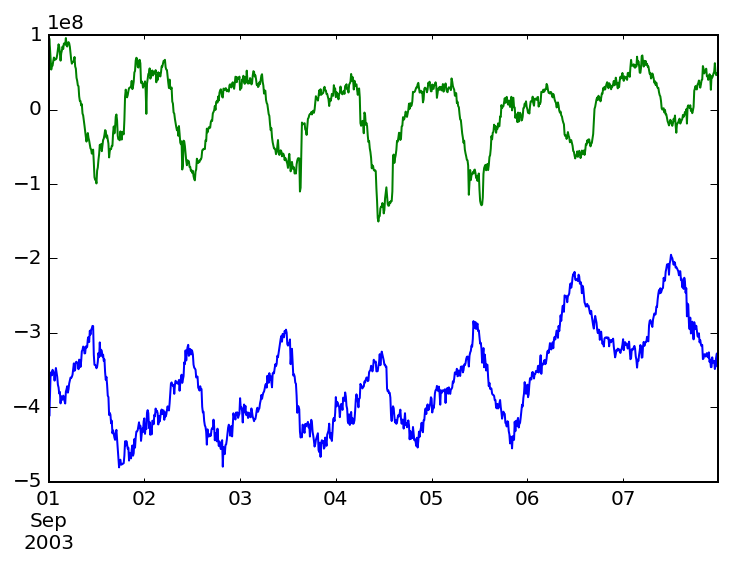

In [12]:
u,s,vt = np.linalg.svd(Atraf,full_matrices=False)
uframe = pd.DataFrame(u.dot(np.diag(s)),index=pd.date_range('9/1/2003',freq='10min',periods=1008))
uframe[0].plot()
uframe[1].plot()